In [2]:
import numpy as np
import os

import matplotlib.pyplot as plt

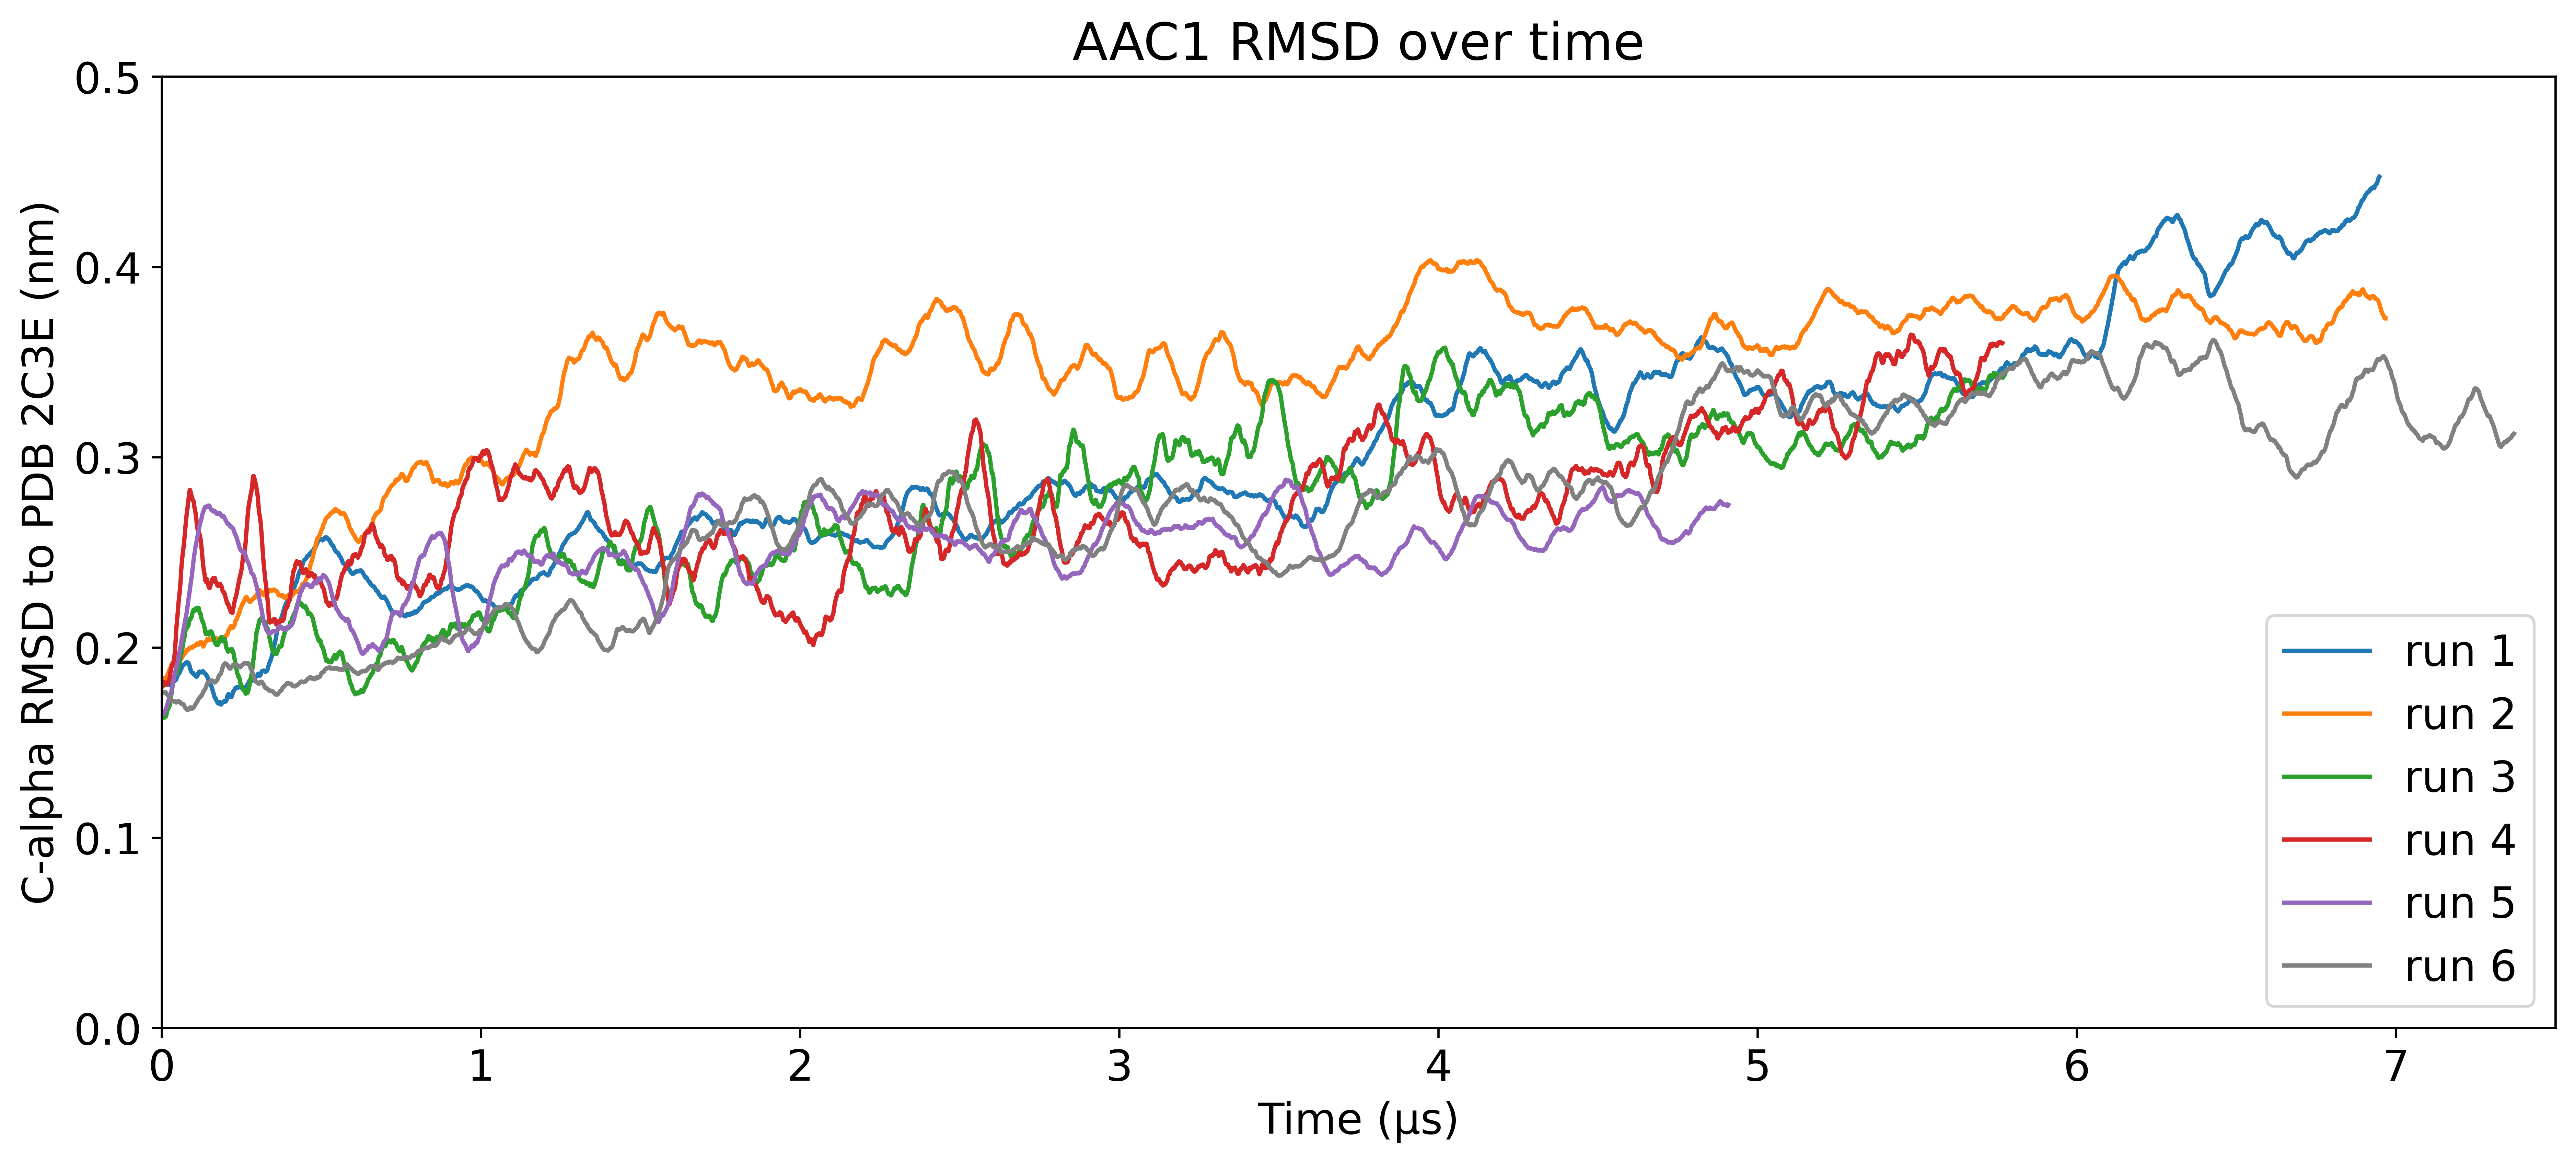

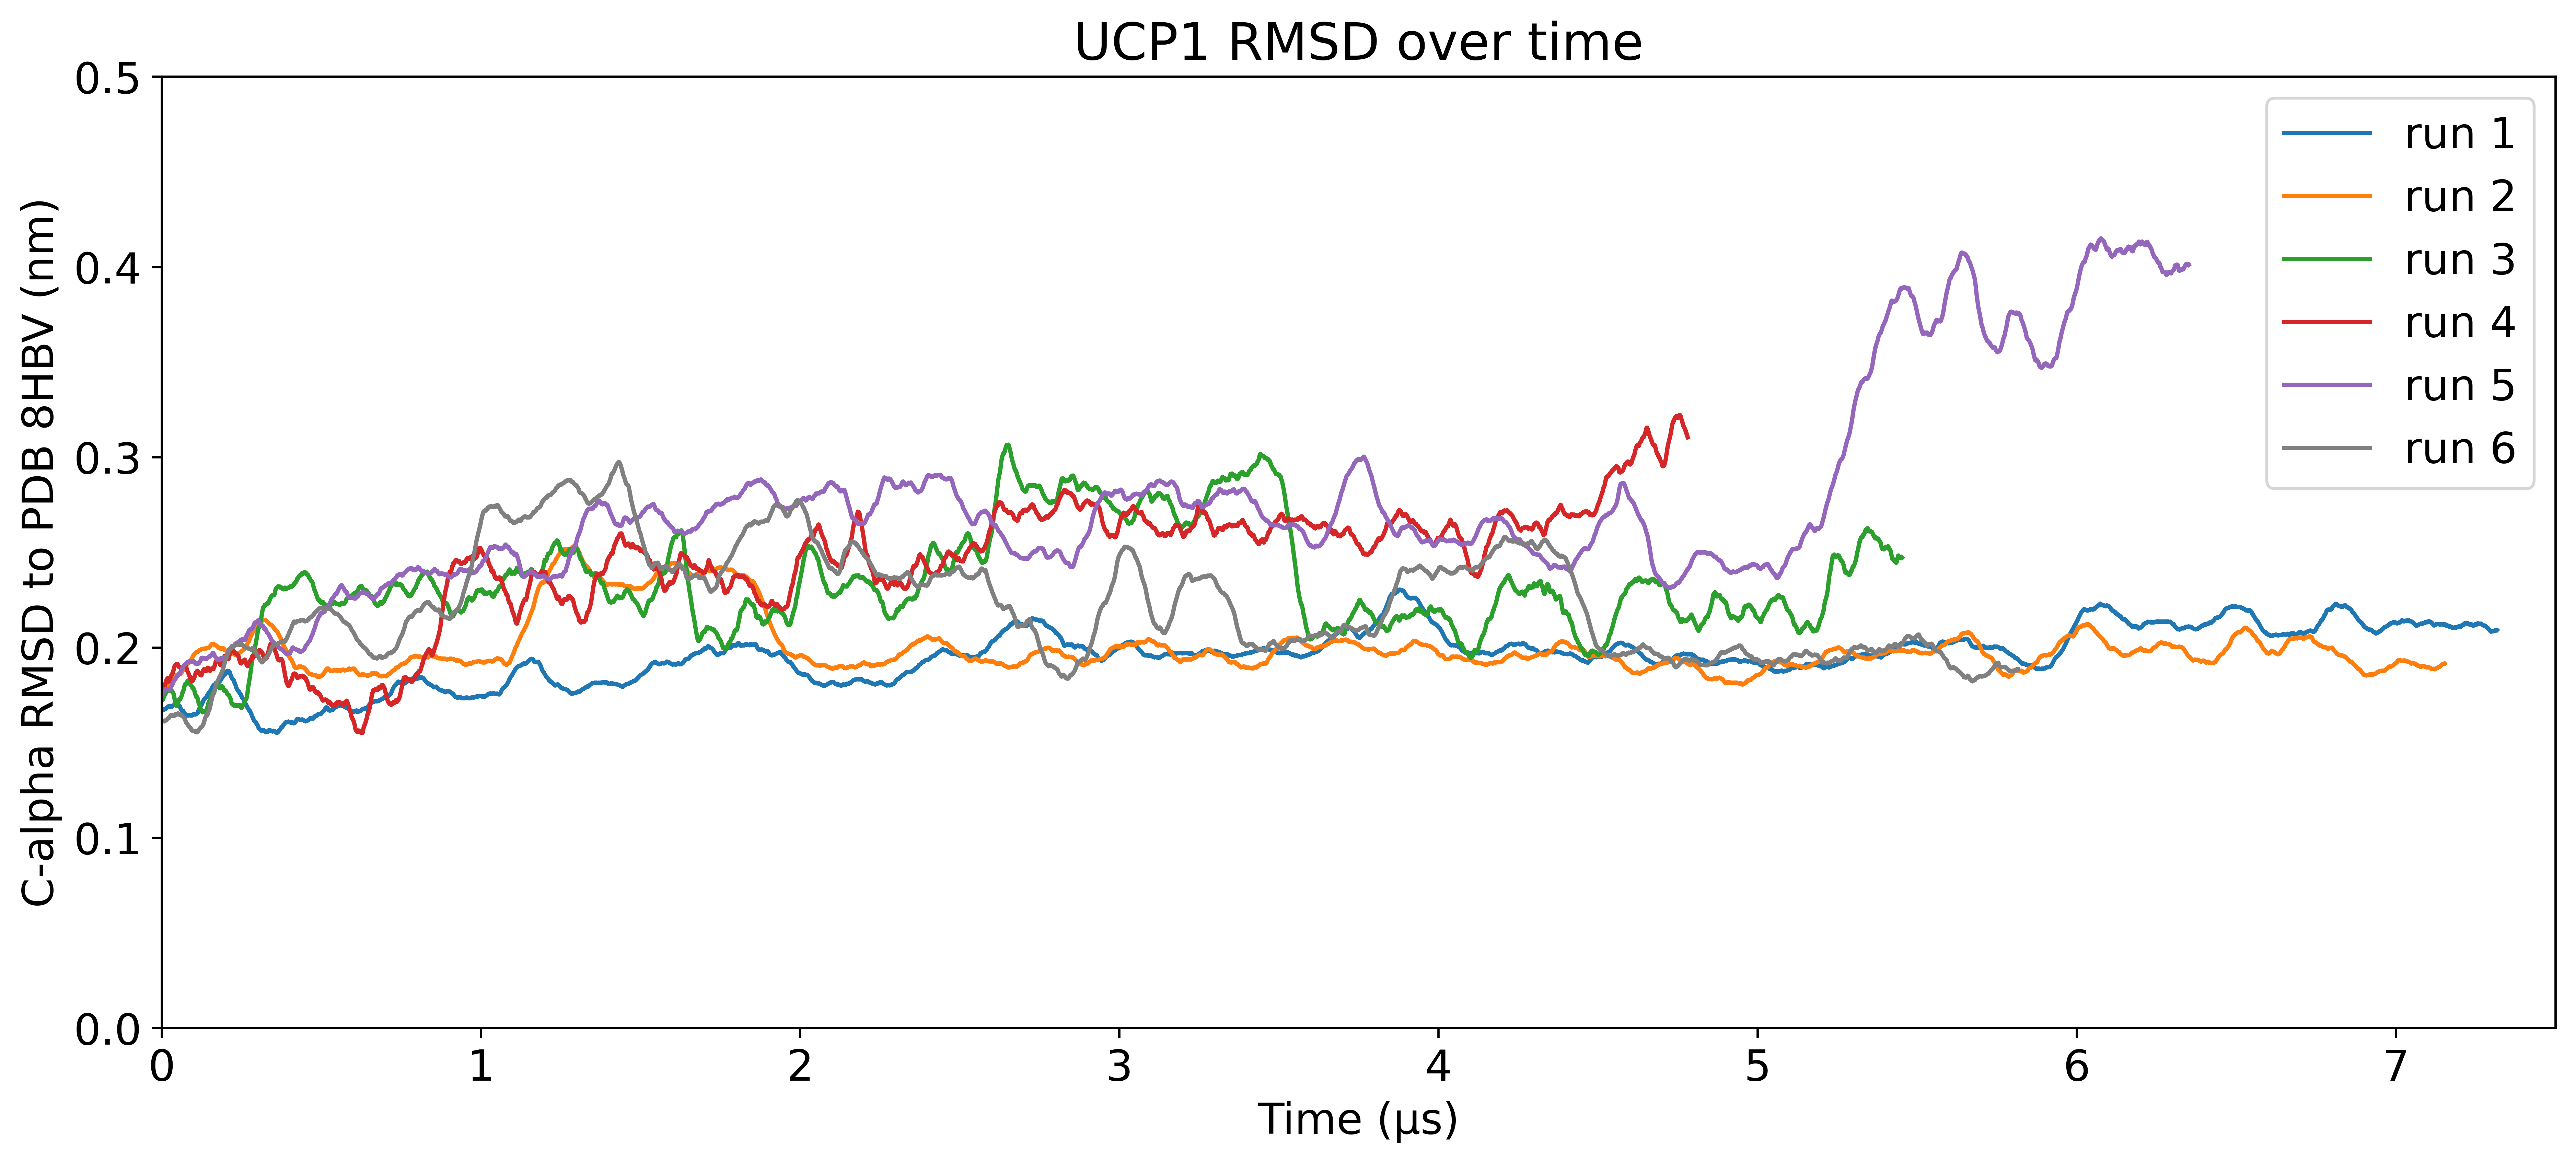

In [6]:
threshold = 0.33
window = 500

colors = ["C0", "C1", "C2", "C3", "C4", "grey"]
pdbids = {"aac1": "2C3E", "ucp1": "8HBV"}

def compile_rmsd():

    inputpath = "/home/jonathan/Documents/grabelab/aac1-ucp1/long-aac1-ucp1/rmsd_rmsf"

    servers = ["wynton", "degrabo"]
    proteins = ["aac1", "ucp1"]

    #loop over servers, proteins, and parallel runs
    for protein in proteins:

        ci = 0

        wire_fractions = []
        legend = []

        plt.figure(figsize = (15,6), dpi=600)

        for server in servers:
            for run in range(1,5):
                if server == "degrabo" and run > 2:
                    continue

                #step is in microseconds
                if server == "wynton" and (run == 3 or run == 4):
                    step = 1/10000
                else:
                    step = 1/5000

                dists = []
 
                for seg in range(1,20):

                    file = f"{inputpath}/{server}/{protein}/run0{run}/{protein}-{server}-run{str(run).zfill(2)}-seg{str(seg).zfill(2)}-rmsd.npy"

                    if os.path.exists(file):
                        dists.append(np.load(file))

                dists = np.concatenate(dists)
                #print(min(dists))
                smoothed_dists = [np.mean(dists[i:i+window]) for i in range(len(dists)-window)]

                plt.plot([i*step for i in range(len(smoothed_dists))], smoothed_dists, linewidth = 1.5, color = colors[ci])

                #plt.plot([i*step for i in range(len(dists))], dists, linewidth = 0.5)
                legend.append(f"run {ci+1}")
                #plt.show()
                ci += 1
                
        #plt.axhline(0.33, 0, 8, color="black")

        plt.rcParams.update({'font.size': 15})
        # creating a dictionary
        font = {'size': 15}
        # using rc function
        plt.rc('font', **font)

        plt.xlim(0,7.5)
        plt.ylim(0,0.5)
        plt.legend(legend)
        plt.title(f"{protein.upper()} RMSD over time")
        plt.xlabel("Time (µs)")
        plt.ylabel(f"C-alpha RMSD to PDB {pdbids[protein]} (nm)")
 
        plt.savefig(f"{inputpath}/rmsd_{protein}.svg", bbox_inches='tight', format ='svg')

        plt.show()

        #print(wire_fractions)
        #print(f"wire forms {np.round(np.mean(wire_fractions), 4)}+={np.round(np.std(wire_fractions), 4)} of the time")


compile_rmsd()

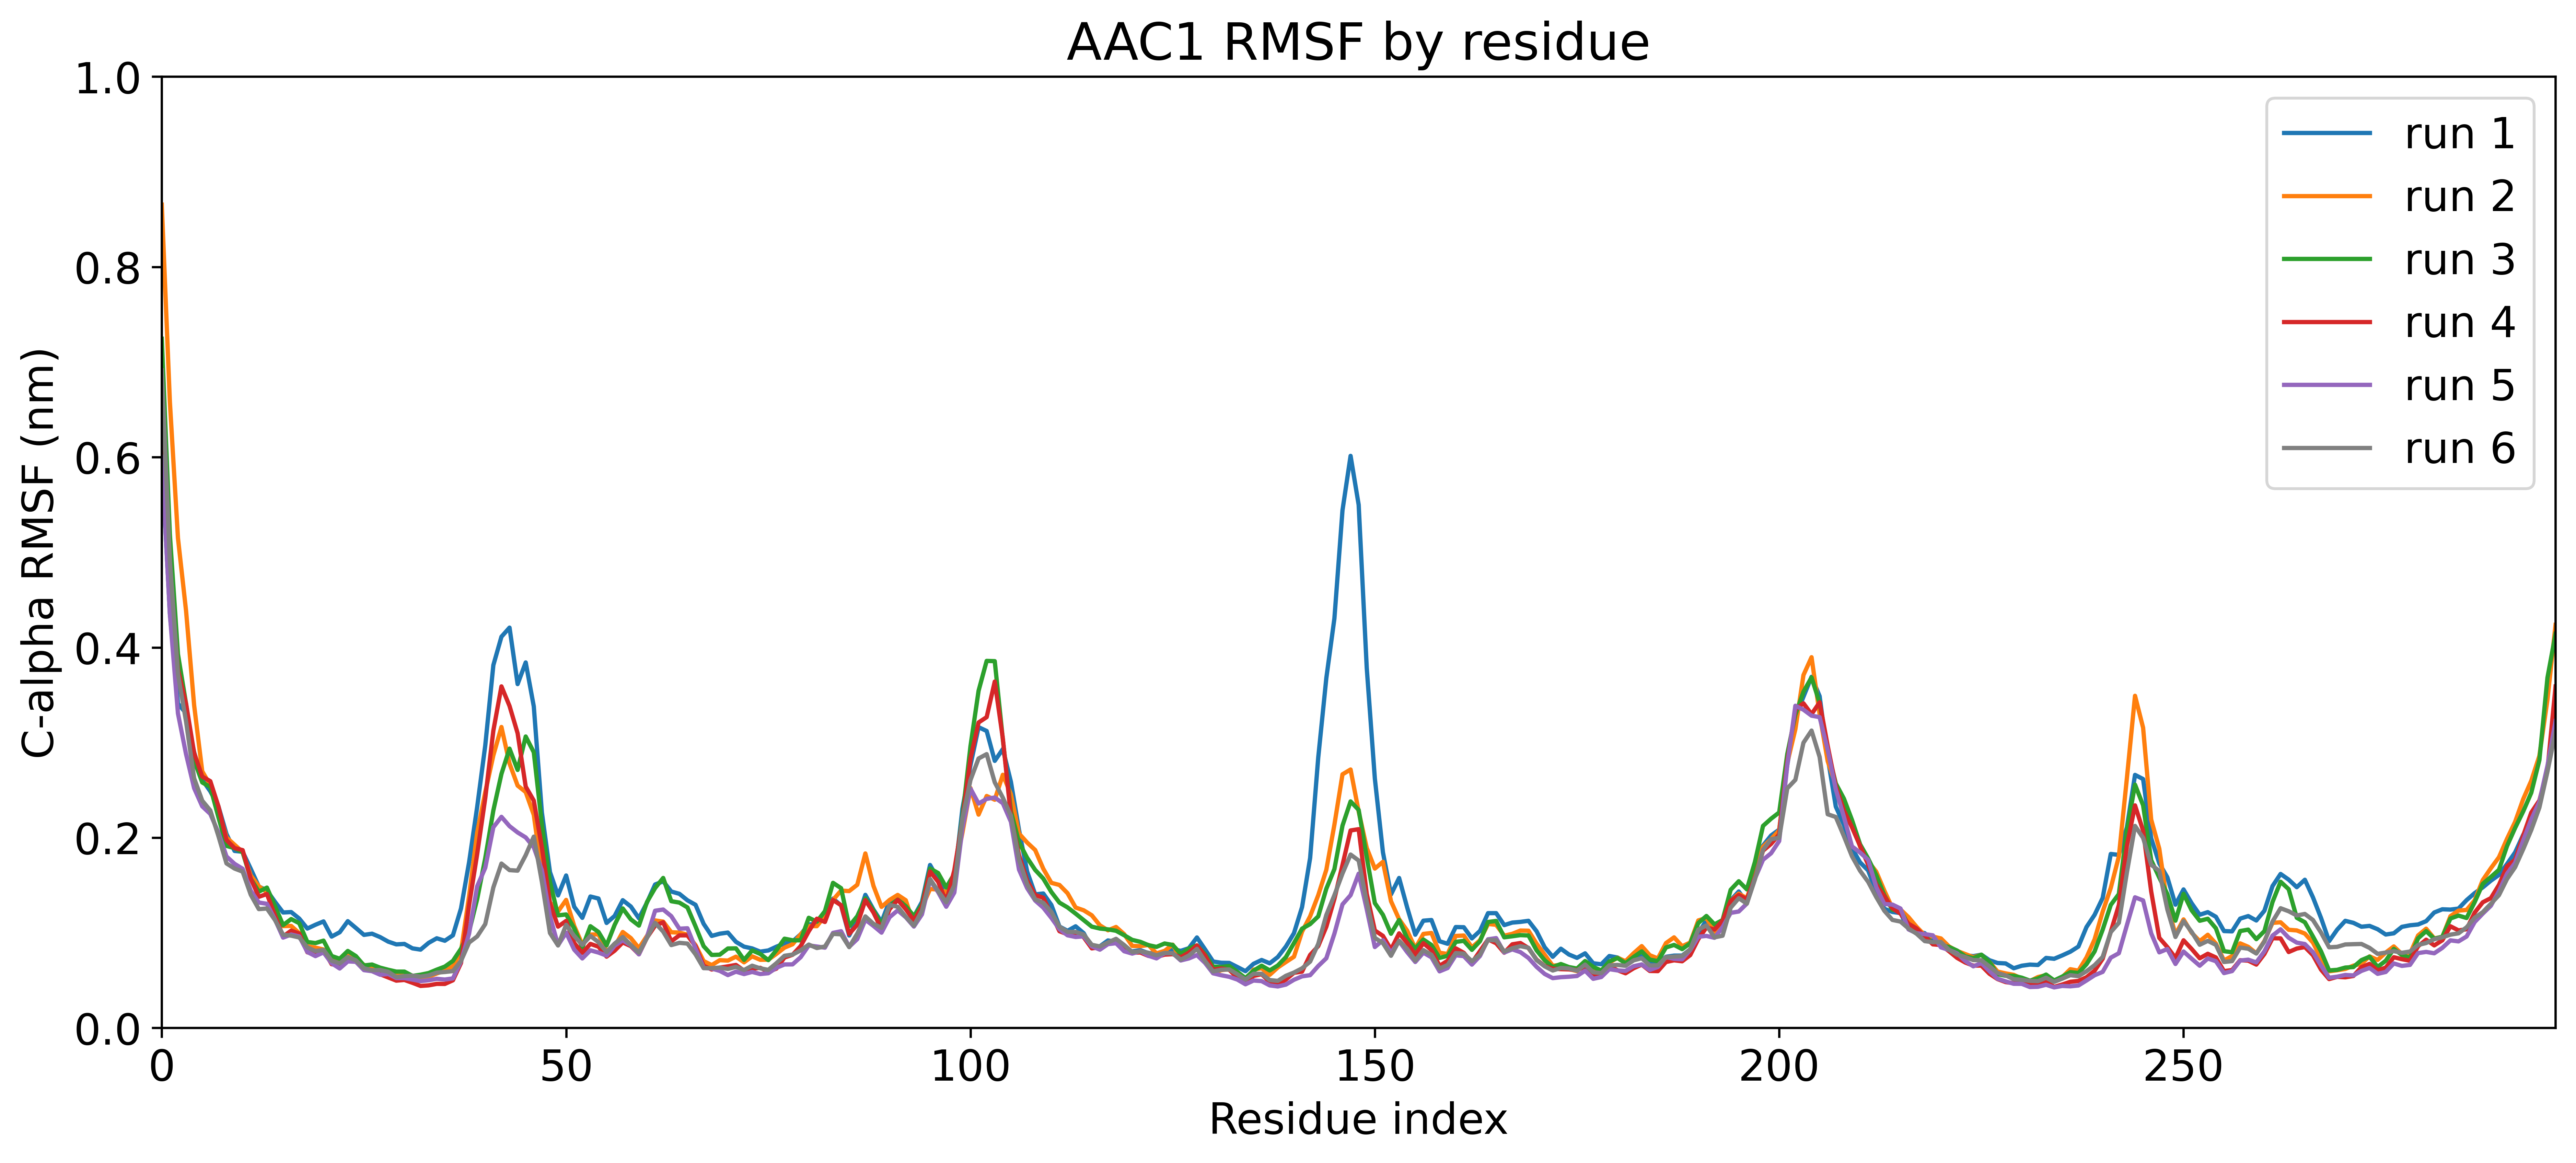

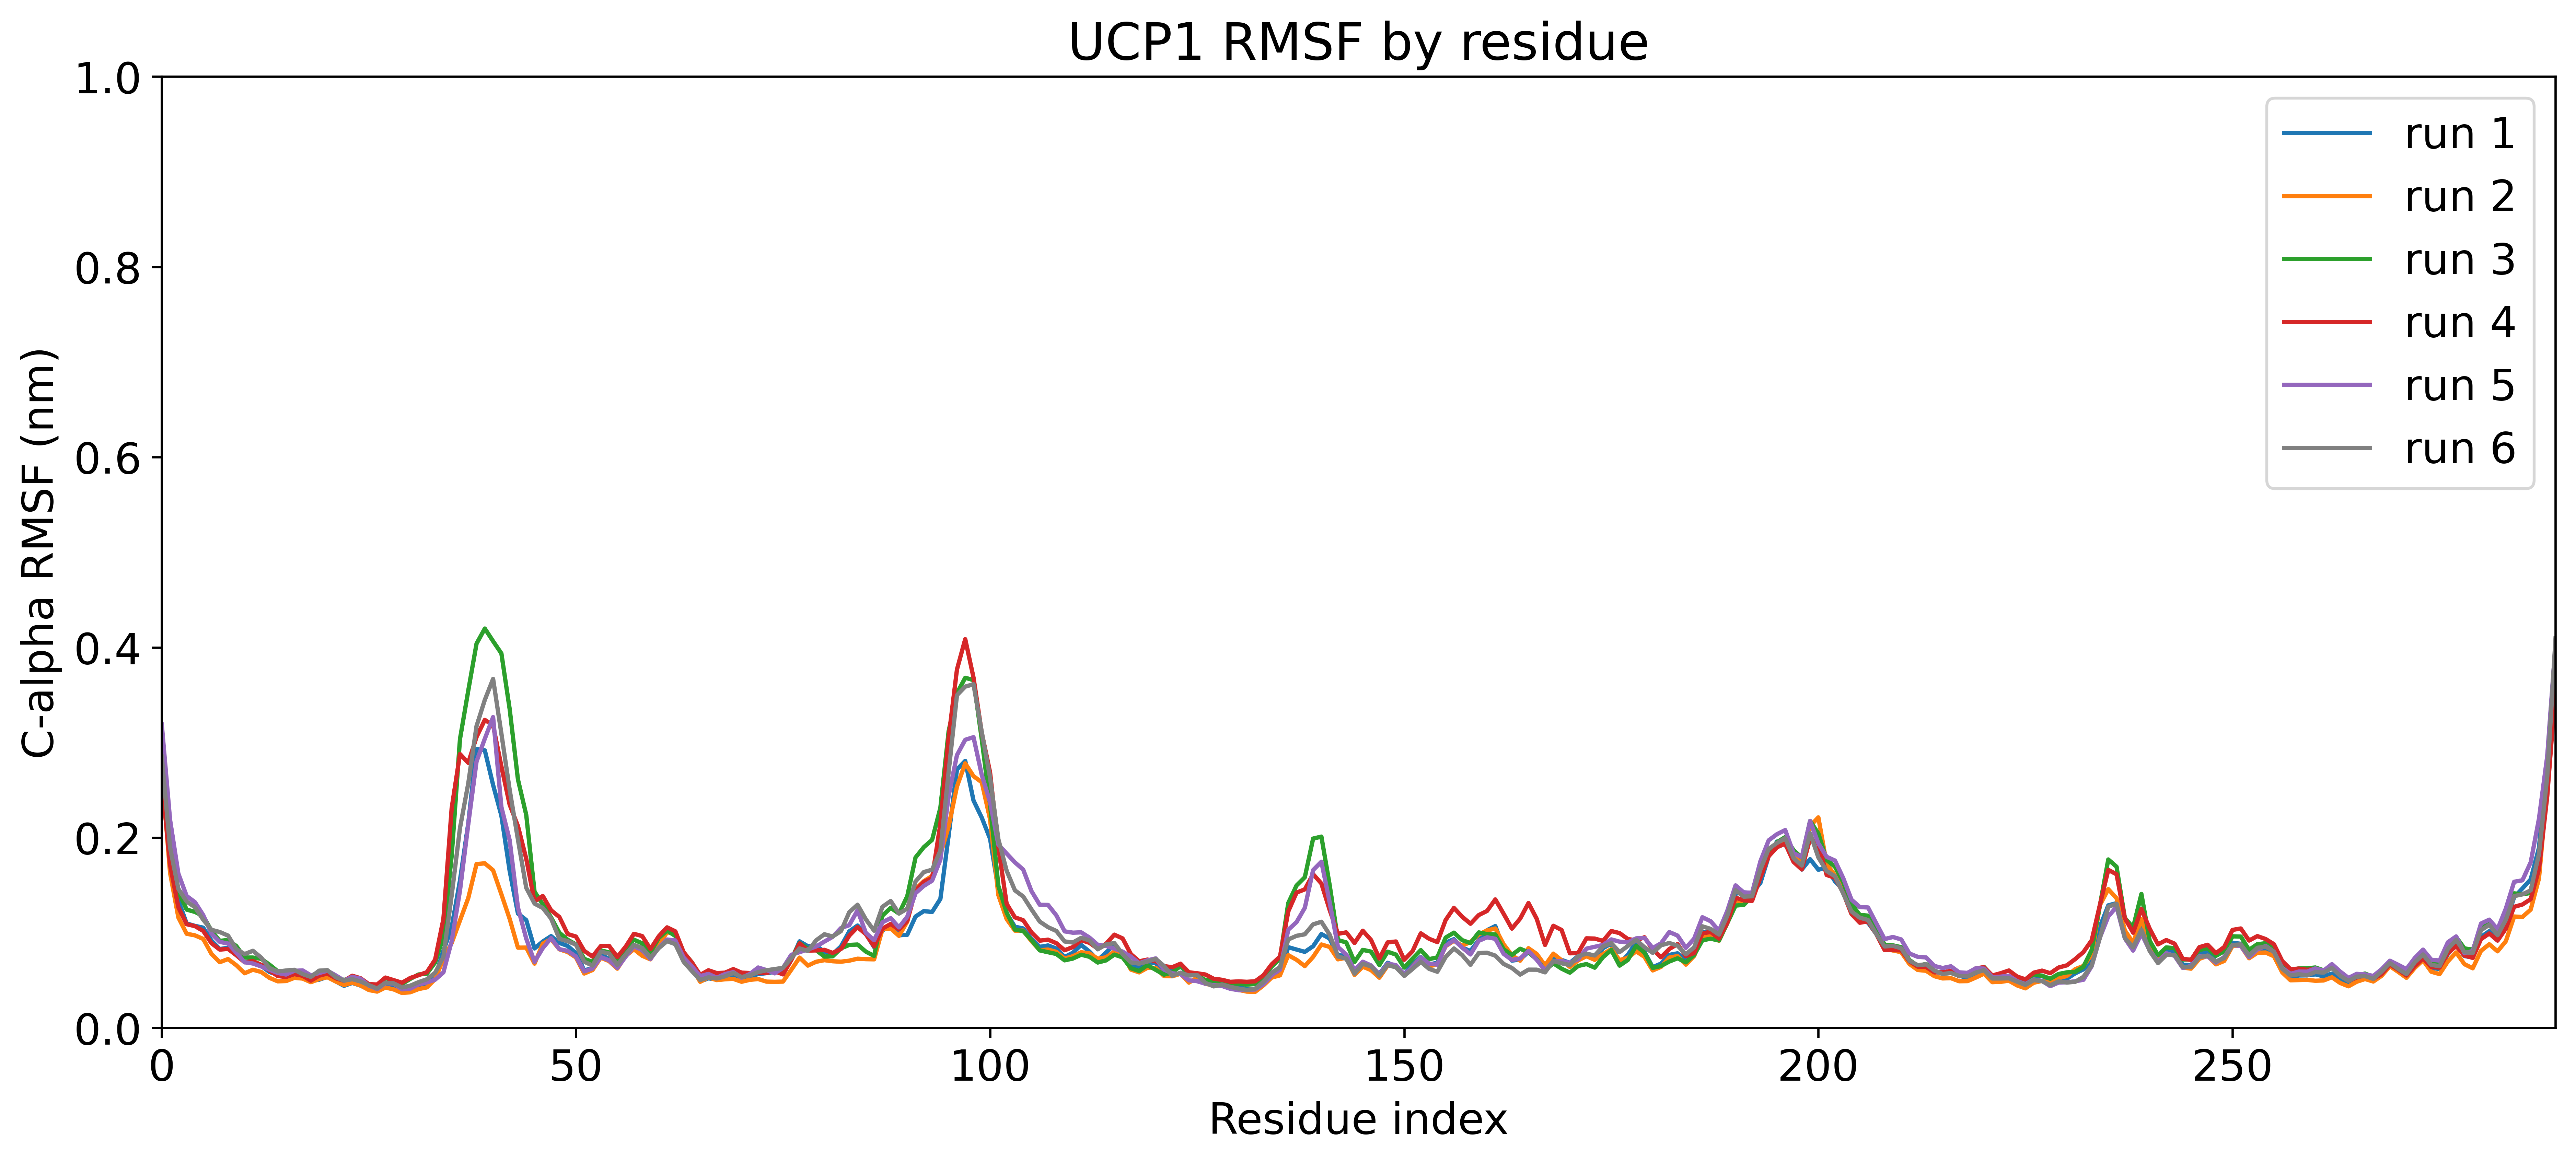

In [5]:

def compile_rmsd():

    inputpath = "/home/jonathan/Documents/grabelab/aac1-ucp1/long-aac1-ucp1/rmsd_rmsf"

    servers = ["wynton", "degrabo"]
    proteins = ["aac1", "ucp1"]

    colors = ["C0", "C1", "C2", "C3", "C4", "grey"]

    #loop over servers, proteins, and parallel runs
    for protein in proteins:

        rmsfs = []
        legend = []

        rmsflen = 0
        ci = 0

        plt.figure(figsize = (15,6), dpi=600)

        for server in servers:
            for run in range(1,5):
                if server == "degrabo" and run > 2:
                    continue

                #step is in microseconds
                # if server == "wynton" and (run == 3 or run == 4):
                #     step = 1/10000
                # else:
                #     step = 1/5000

                dists = []
 
                for seg in range(1,20):

                    file = f"{inputpath}/{server}/{protein}/run0{run}/{protein}-{server}-run{str(run).zfill(2)}-seg{str(seg).zfill(2)}-rmsf.npy"

                    if os.path.exists(file):
                        dists.append(np.load(file))

                rmsf = np.mean(np.stack(dists), axis = 0)
                rmsflen = len(rmsf)
                rmsfs.append(rmsf)

                plt.plot(rmsf, color = colors[ci])
                legend.append(f"run {ci+1}")
                #plt.show()

                ci += 1
                

        plt.rcParams.update({'font.size': 15})
        # creating a dictionary
        font = {'size': 15}
        # using rc function
        plt.rc('font', **font)

        plt.xlim(0,rmsflen-1)
        plt.ylim(0,1)
        plt.legend(legend)
        plt.title(f"{protein.upper()} RMSF by residue")
        plt.xlabel("Residue index")
        plt.ylabel(f"C-alpha RMSF (nm)")

        plt.savefig(f"{inputpath}/rmsf_{protein}.svg", bbox_inches='tight', format ='svg')

        plt.show()


compile_rmsd()

In [5]:
def resqueries(protein):

    terminal_residues = {
        "aac1":
       [[6,   37],
        [53,  99],
        [108, 142],
        [156, 200],
        [209, 240],
        [253, 296]],
        "ucp1":
       [[12,  42],
        [57,  106],
        [112, 142],
        [156, 204],
        [211, 241],
        [250, 295]]
    }
    
    rqa = []

    resqueries = []
    for rt in terminal_residues[protein]:
        helix_resseqs = [i for i in range(rt[0], rt[1]+1)]
        #print("color red, resi " + "+".join([str(i) for i in helix_resseqs]))

        rqa.append("+".join([str(i) for i in helix_resseqs]))
        resqueries.append(" or ".join([f"resSeq {i}" for i in helix_resseqs]))
    
    return resqueries, " or ".join(resqueries), "+".join(rqa)

rq0, rq1, rq2 = resqueries("ucp1")
print(rq2)

12+13+14+15+16+17+18+19+20+21+22+23+24+25+26+27+28+29+30+31+32+33+34+35+36+37+38+39+40+41+42+57+58+59+60+61+62+63+64+65+66+67+68+69+70+71+72+73+74+75+76+77+78+79+80+81+82+83+84+85+86+87+88+89+90+91+92+93+94+95+96+97+98+99+100+101+102+103+104+105+106+112+113+114+115+116+117+118+119+120+121+122+123+124+125+126+127+128+129+130+131+132+133+134+135+136+137+138+139+140+141+142+156+157+158+159+160+161+162+163+164+165+166+167+168+169+170+171+172+173+174+175+176+177+178+179+180+181+182+183+184+185+186+187+188+189+190+191+192+193+194+195+196+197+198+199+200+201+202+203+204+211+212+213+214+215+216+217+218+219+220+221+222+223+224+225+226+227+228+229+230+231+232+233+234+235+236+237+238+239+240+241+250+251+252+253+254+255+256+257+258+259+260+261+262+263+264+265+266+267+268+269+270+271+272+273+274+275+276+277+278+279+280+281+282+283+284+285+286+287+288+289+290+291+292+293+294+295
